In [418]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import cv2

In [419]:
ABS_PATH = os.path.abspath("")
IMG_PATH = os.path.join(ABS_PATH, "images")

frame = cv2.imread(os.path.join(IMG_PATH, "Colesdalen.JPG"))
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
frame = cv2.resize(frame, (800, 500))

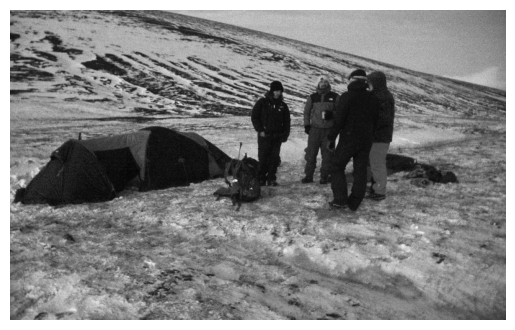

In [420]:
plt.imshow(frame, cmap="gray")
plt.axis("off");

$\displaystyle I=\log_2\left(P(e_i)\right)$

The Entropy $E$ is defined as the sum of the probabilities $e_i$ multiplied with the information content $I_i$

$\displaystyle E:= - \sum_{i=1...N}{P(e_i)\cdot \log_2\left(P(e_i)\right)}$

In [421]:
def get_information_content(frame):
    hist = np.histogram(frame, bins=256)[0]
    prob = hist/hist.sum()
    info = np.where(prob>1e-6, np.log2(prob), 0)
    return info

In [422]:
def get_entropy(frame):
    info = get_information_content(frame)
    hist = np.histogram(frame, bins=256)[0]
    prob = hist/hist.sum()
    
    entropy = -(prob * info)[~np.isnan(prob)].sum()
    return entropy

According to histogram equalization, we want to maximize the information content of the image. That means that the histogram of the image should be uniformly distributed.

In [423]:
get_entropy(frame)

C:\Users\moorb\AppData\Local\Temp\ipykernel_32088\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


6.544481825654289

In [424]:
def histogram_equalization(frame):
    hist = np.histogram(frame, bins=256)[0]
    prob = hist/hist.sum()
    transfer = np.cumsum(prob) -np.arange(256)/256 
    transfer = {i:val for i, val in enumerate(transfer)}
    return transfer

In [425]:
transfer = histogram_equalization(frame)

frame_he = np.ones_like(frame)
for i in range(frame.shape[0]):
    for j in range(frame.shape[1]):
        frame_he[i,j] = frame[i,j] + frame[i,j] * -transfer[frame[i,j]]


C:\Users\moorb\AppData\Local\Temp\ipykernel_32088\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


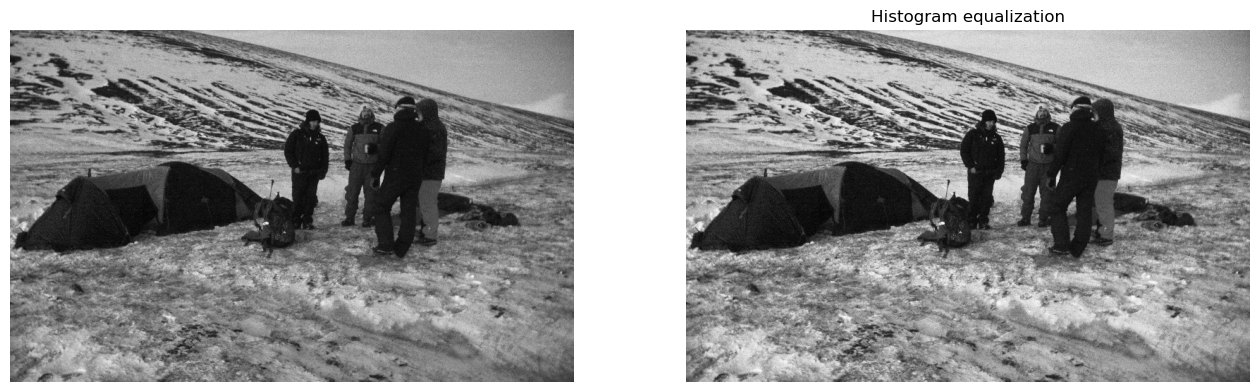

In [426]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.imshow(frame, cmap="gray")
ax2.imshow(frame_he, cmap="gray")
ax1.axis("off")
ax2.axis("off")
get_entropy(frame_he)
plt.title("Histogram equalization");

C:\Users\moorb\AppData\Local\Temp\ipykernel_32088\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


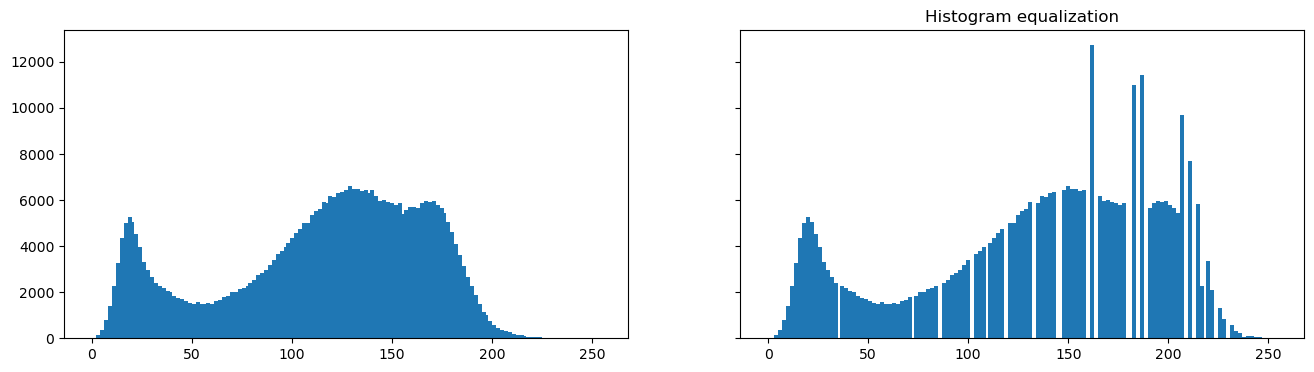

In [427]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4), sharex=True, sharey=True)


info = get_information_content(frame)
hist = np.histogram(frame, bins=255)[0]
ax1.bar(np.arange(255), hist, width=2);
info = get_information_content(frame_he)
hist = np.histogram(frame_he, bins=255)[0]
ax2.bar(np.arange(255), hist, width=2);
plt.title("Histogram equalization");

In [428]:
def adaptive_histogram_equalization(frame, n=2, k=395):
    frame_ahe = np.ones_like(frame)
    
    for i in range(n, frame.shape[0]-n, n*2):
        for j in range(k, frame.shape[1]-k, k*2):
            curr_frame = frame[i-n:i+n, j-k:j+k]
            transfer = histogram_equalization(curr_frame)
            
            for x in range(curr_frame.shape[0]):
                for y in range(curr_frame.shape[1]):
                    frame_ahe[i-n+x:i+n+x,j-k+y:j+k+y] = curr_frame[x,y] + curr_frame[x,y] * -transfer[curr_frame[x,y]]
        
    return frame_ahe

In [429]:
frame_ahe = adaptive_histogram_equalization(frame)

C:\Users\moorb\AppData\Local\Temp\ipykernel_32088\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


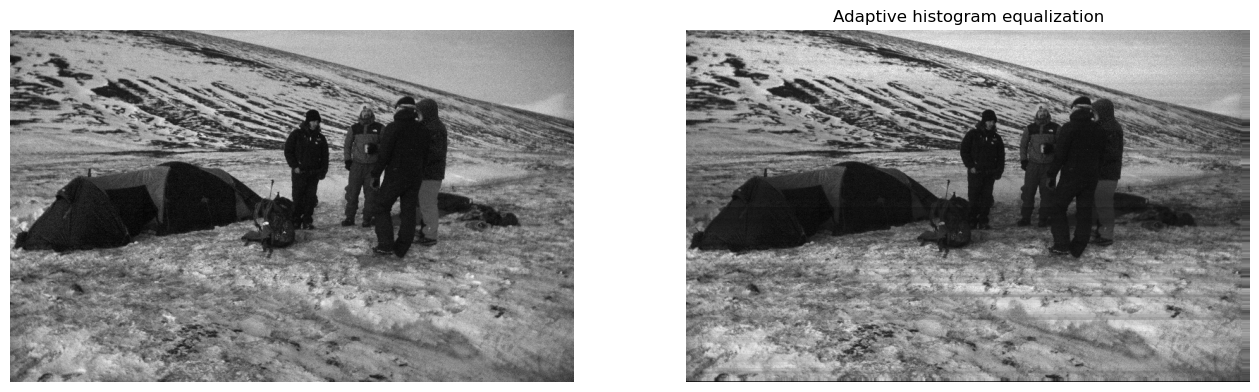

In [430]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.imshow(frame, cmap="gray")
ax2.imshow(frame_ahe, cmap="gray")
ax1.axis("off")
ax2.axis("off")
get_entropy(frame_ahe)
plt.title("Adaptive histogram equalization");

C:\Users\moorb\AppData\Local\Temp\ipykernel_32088\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


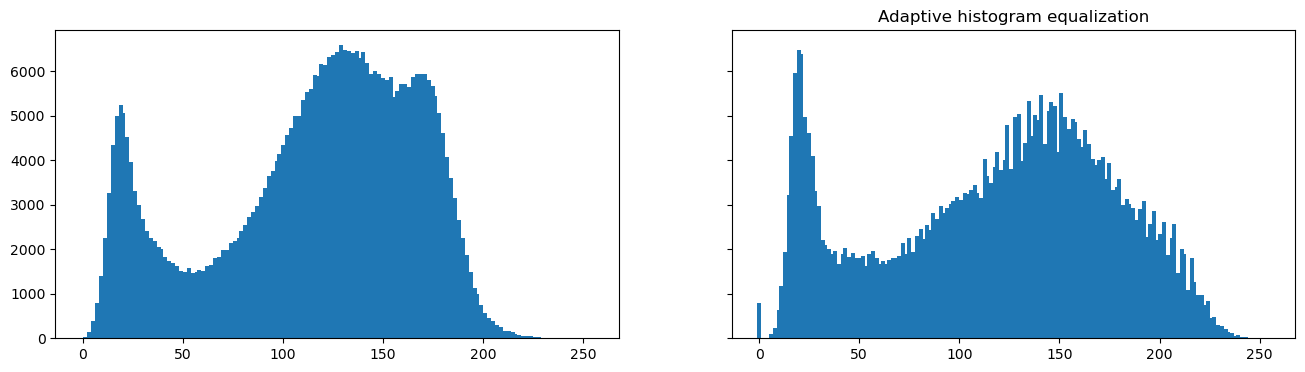

In [431]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4), sharex=True, sharey=True)


info = get_information_content(frame)
hist = np.histogram(frame, bins=255)[0]
ax1.bar(np.arange(255), hist, width=2);
info = get_information_content(frame_ahe)
hist = np.histogram(frame_ahe, bins=255)[0]
ax2.bar(np.arange(255), hist, width=2);
plt.title("Adaptive histogram equalization");

In [432]:
def contrast_limited_histogram_equalization(frame):
    frame_clahe = frame.copy()
    frame_clahe = frame_clahe + 0.8 * adaptive_histogram_equalization(frame)
    return frame_clahe

In [433]:
frame_clahe = contrast_limited_histogram_equalization(frame)

C:\Users\moorb\AppData\Local\Temp\ipykernel_32088\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


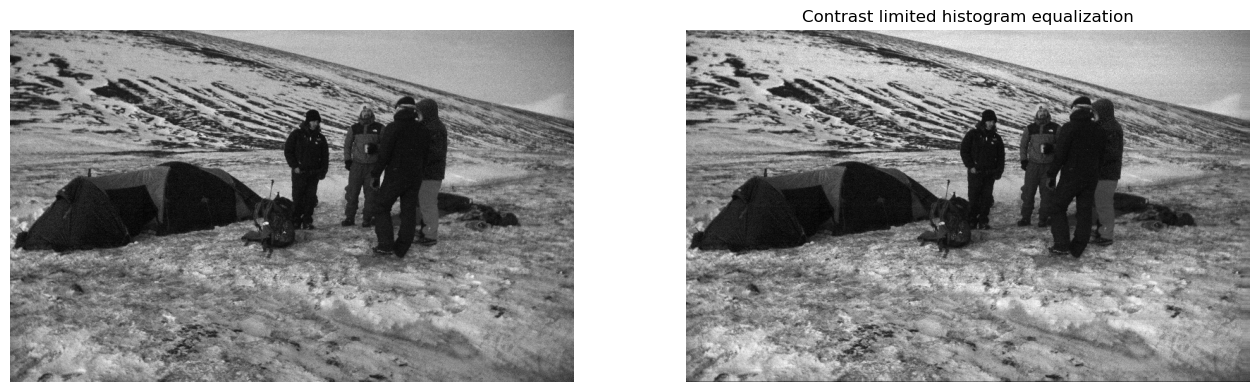

In [434]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.imshow(frame, cmap="gray")
ax2.imshow(frame_clahe, cmap="gray")
ax1.axis("off")
ax2.axis("off")
get_entropy(frame_clahe)
plt.title("Contrast limited histogram equalization");

C:\Users\moorb\AppData\Local\Temp\ipykernel_32088\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


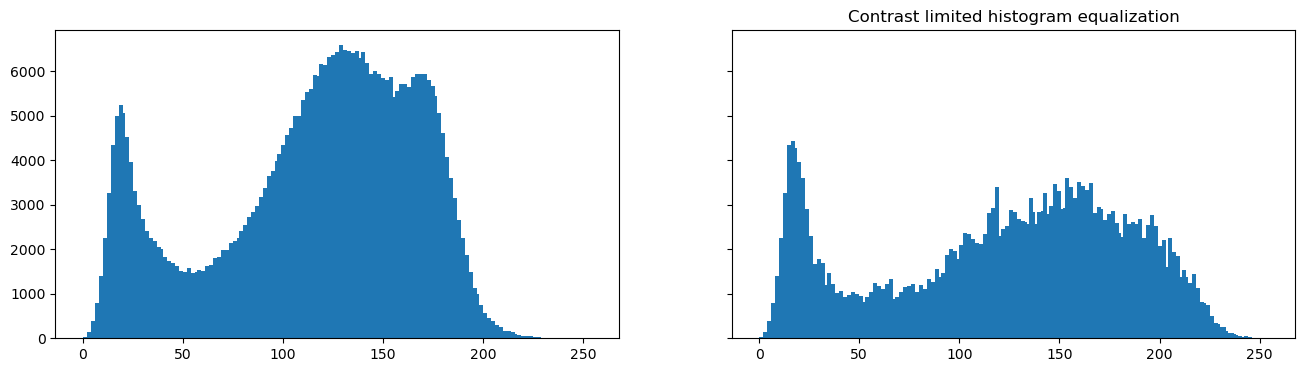

In [435]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4), sharex=True, sharey=True)


info = get_information_content(frame)
hist = np.histogram(frame, bins=255)[0]
ax1.bar(np.arange(255), hist, width=2);
info = get_information_content(frame_clahe)
hist = np.histogram(frame_clahe, bins=255)[0]
ax2.bar(np.arange(255), hist, width=2);
plt.title("Contrast limited histogram equalization");